In [531]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('merc_price(2020) data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [532]:
df = pd.read_excel('merc.xlsx', sheet_name='merc')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,A Class,2019,21998,Semi-Auto,11578,Petrol,150,53.3,1.3
1,A Class,2014,10498,Manual,63177,Diesel,30,64.2,2.1
2,A Class,2016,12498,Manual,54544,Diesel,20,72.4,1.5
3,A Class,2018,17498,Manual,8601,Petrol,145,51.4,1.6
4,A Class,2017,16798,Manual,24388,Diesel,20,68.9,1.5
...,...,...,...,...,...,...,...,...,...
439,V Class,2016,26490,Semi-Auto,32494,Diesel,200,45.6,2.2
440,V Class,2018,19498,Manual,24164,Diesel,145,46.3,2.1
441,V Class,2018,20498,Manual,25254,Diesel,145,46.3,2.1
442,V Class,2018,20498,Manual,20841,Diesel,145,46.3,2.1


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             444 non-null    object 
 1   year              444 non-null    int64  
 2   price             444 non-null    int64  
 3   type              444 non-null    object 
 4   distance          444 non-null    int64  
 5   fuel              444 non-null    object 
 6   tax               444 non-null    int64  
 7   miles per galoon  444 non-null    float64
 8   size              444 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 31.3+ KB


В базе данных нет пропущенных знвчений

In [535]:
df.isnull().sum()

model               0
year                0
price               0
type                0
distance            0
fuel                0
tax                 0
miles per galoon    0
size                0
dtype: int64

In [536]:
df.dtypes

model                object
year                  int64
price                 int64
type                 object
distance              int64
fuel                 object
tax                   int64
miles per galoon    float64
size                float64
dtype: object

In [537]:
df.describe()

,year,price,distance,tax,miles per galoon,size
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,2016.594595,22308.448198,25755.344595,128.716216,56.712387,2.102252
std,2.238100,8470.098592,19756.933182,64.436580,13.638561,0.478046
min,2004.000000,2880.000000,17.000000,0.000000,28.000000,1.300000
25%,2016.000000,17493.500000,11492.500000,125.000000,47.900000,2.000000
50%,2017.000000,20824.500000,22909.000000,145.000000,56.500000,2.100000
75%,2018.000000,26983.750000,34377.000000,146.250000,64.200000,2.100000
max,2020.000000,64998.000000,130000.000000,330.000000,134.500000,4.700000


In [538]:
df.columns

Index(['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size'],
      dtype='object')

In [539]:
df.columns = ['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size']

In [540]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std()
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std()
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [541]:
df = outliers(df)
df.describe()

,year,price,distance,tax,miles per galoon,size
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,2016.637752,22199.329297,25467.468489,128.691558,56.240469,2.097011
std,2.065282,8053.960267,18645.395418,64.361121,11.415221,0.455323
min,2009.880295,2880.000000,17.000000,0.000000,28.000000,1.300000
25%,2016.000000,17493.500000,11492.500000,125.000000,47.900000,2.000000
50%,2017.000000,20824.500000,22909.000000,145.000000,56.500000,2.100000
75%,2018.000000,26983.750000,34377.000000,146.250000,64.200000,2.100000
max,2020.000000,47718.743976,85026.144142,322.025955,97.628070,3.536389


In [542]:
df.shape

(444, 9)

In [543]:
df['type'].nunique()

3

In [544]:
for col in df:
    print(df['type'].unique())

['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']
['Semi-Auto' 'Manual' 'Automatic']


In [546]:
#encoding transmission
from sklearn import preprocessing
df['type'] = preprocessing.LabelEncoder().fit_transform(df['type'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,A Class,2019.0,21998.0,2,11578.0,Petrol,150.0,53.3,1.3
1,A Class,2014.0,10498.0,1,63177.0,Diesel,30.0,64.2,2.1
2,A Class,2016.0,12498.0,1,54544.0,Diesel,20.0,72.4,1.5
3,A Class,2018.0,17498.0,1,8601.0,Petrol,145.0,51.4,1.6
4,A Class,2017.0,16798.0,1,24388.0,Diesel,20.0,68.9,1.5
5,A Class,2017.0,15498.0,1,35295.0,Diesel,20.0,68.9,1.5
6,A Class,2019.0,18241.0,0,15722.0,Diesel,145.0,65.7,1.5
7,A Class,2018.0,17498.0,2,15597.0,Diesel,145.0,68.9,2.1
8,A Class,2013.0,11998.0,1,13680.0,Petrol,125.0,51.4,1.6
9,A Class,2020.0,28128.0,0,2563.0,Petrol,145.0,47.9,1.3


К числовому формату привели фактор type

In [547]:
df['fuel'].nunique()

3

In [548]:
for col in df:
    print(df['fuel'].unique())

['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']


In [549]:
#encoding fuel
from sklearn import preprocessing
df['fuel'] = preprocessing.LabelEncoder().fit_transform(df['fuel'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,A Class,2019.0,21998.0,2,11578.0,2,150.0,53.3,1.3
1,A Class,2014.0,10498.0,1,63177.0,0,30.0,64.2,2.1
2,A Class,2016.0,12498.0,1,54544.0,0,20.0,72.4,1.5
3,A Class,2018.0,17498.0,1,8601.0,2,145.0,51.4,1.6
4,A Class,2017.0,16798.0,1,24388.0,0,20.0,68.9,1.5
5,A Class,2017.0,15498.0,1,35295.0,0,20.0,68.9,1.5
6,A Class,2019.0,18241.0,0,15722.0,0,145.0,65.7,1.5
7,A Class,2018.0,17498.0,2,15597.0,0,145.0,68.9,2.1
8,A Class,2013.0,11998.0,1,13680.0,2,125.0,51.4,1.6
9,A Class,2020.0,28128.0,0,2563.0,2,145.0,47.9,1.3


К числовому формату привели фактор fuel

In [550]:
df['model'].nunique()

17

In [551]:
for col in df:
    print(df['model'].unique())

['A Class' 'B Class' 'C Class' 'CL Class' 'CLA Class' 'CLC Class'
 'CLS Class' 'E Class' 'GLA Class' 'GLC Class' 'GLE Class' 'GLS Class'
 'M Class' 'S Class' 'SL CLASS' 'SLK' 'V Class']
['A Class' 'B Class' 'C Class' 'CL Class' 'CLA Class' 'CLC Class'
 'CLS Class' 'E Class' 'GLA Class' 'GLC Class' 'GLE Class' 'GLS Class'
 'M Class' 'S Class' 'SL CLASS' 'SLK' 'V Class']
['A Class' 'B Class' 'C Class' 'CL Class' 'CLA Class' 'CLC Class'
 'CLS Class' 'E Class' 'GLA Class' 'GLC Class' 'GLE Class' 'GLS Class'
 'M Class' 'S Class' 'SL CLASS' 'SLK' 'V Class']
['A Class' 'B Class' 'C Class' 'CL Class' 'CLA Class' 'CLC Class'
 'CLS Class' 'E Class' 'GLA Class' 'GLC Class' 'GLE Class' 'GLS Class'
 'M Class' 'S Class' 'SL CLASS' 'SLK' 'V Class']
['A Class' 'B Class' 'C Class' 'CL Class' 'CLA Class' 'CLC Class'
 'CLS Class' 'E Class' 'GLA Class' 'GLC Class' 'GLE Class' 'GLS Class'
 'M Class' 'S Class' 'SL CLASS' 'SLK' 'V Class']
['A Class' 'B Class' 'C Class' 'CL Class' 'CLA Class' 'CLC Class'
 'CL

In [552]:
#encoding body
from sklearn import preprocessing
df['model'] = preprocessing.LabelEncoder().fit_transform(df['model'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,0,2019.0,21998.0,2,11578.0,2,150.0,53.3,1.3
1,0,2014.0,10498.0,1,63177.0,0,30.0,64.2,2.1
2,0,2016.0,12498.0,1,54544.0,0,20.0,72.4,1.5
3,0,2018.0,17498.0,1,8601.0,2,145.0,51.4,1.6
4,0,2017.0,16798.0,1,24388.0,0,20.0,68.9,1.5
5,0,2017.0,15498.0,1,35295.0,0,20.0,68.9,1.5
6,0,2019.0,18241.0,0,15722.0,0,145.0,65.7,1.5
7,0,2018.0,17498.0,2,15597.0,0,145.0,68.9,2.1
8,0,2013.0,11998.0,1,13680.0,2,125.0,51.4,1.6
9,0,2020.0,28128.0,0,2563.0,2,145.0,47.9,1.3


К числовому формату привели фактор model

In [553]:
df.dtypes

model                 int32
year                float64
price               float64
type                  int64
distance            float64
fuel                  int32
tax                 float64
miles per galoon    float64
size                float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

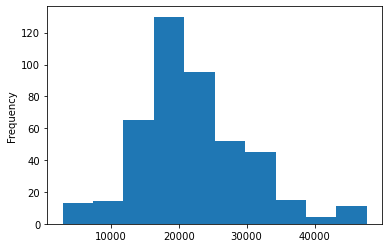

In [554]:
df['price'].plot(kind = 'hist')

Для большиства моделей цена варьируется от 15 до 25 тыс. у.е.

<AxesSubplot:ylabel='Frequency'>

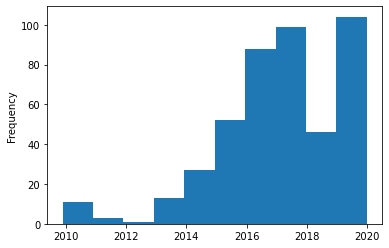

In [555]:
df['year'].plot(kind = 'hist')

Большинство моделей моложе 2016 года выпуска

<AxesSubplot:ylabel='Frequency'>

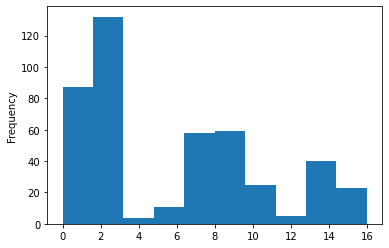

In [559]:
df['model'].plot(kind = 'hist')

Самый распространенный модели A Class, B Class, C Class

<AxesSubplot:ylabel='Frequency'>

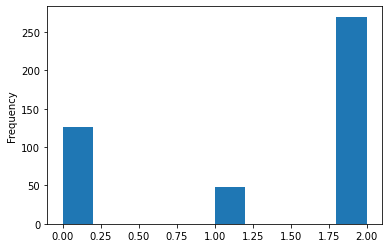

In [558]:
df['type'].plot(kind = 'hist')

Самая распространенная коробка передач - Hybrid

<AxesSubplot:ylabel='Frequency'>

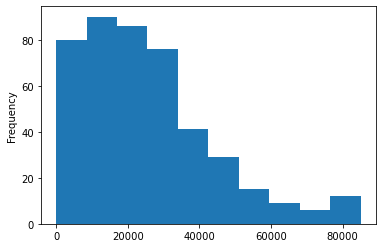

In [560]:
df['distance'].plot(kind = 'hist')

Большинство автомобилей имеют пробег до 30 тыс. км

<AxesSubplot:ylabel='Frequency'>

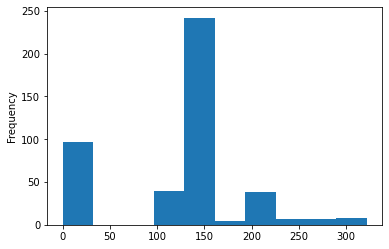

In [561]:
df['tax'].plot(kind = 'hist')

Большиство моделей выборки имеют налог 125-150 у.е.

<AxesSubplot:ylabel='Frequency'>

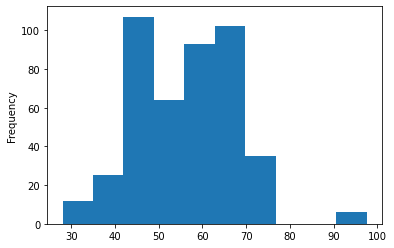

In [562]:
df['miles per galoon'].plot(kind = 'hist')

Большинство автомобидей имеют расход топлива 45-70 

<AxesSubplot:ylabel='Frequency'>

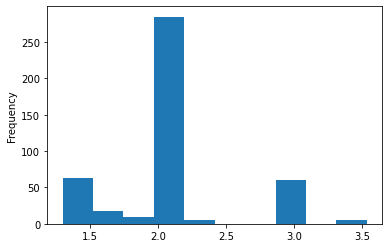

In [563]:
df['size'].plot(kind = 'hist')

Самый распространенный объем двигателя - 2.0 л

In [564]:
df.to_csv('merc1.csv', sep=',', index=False)

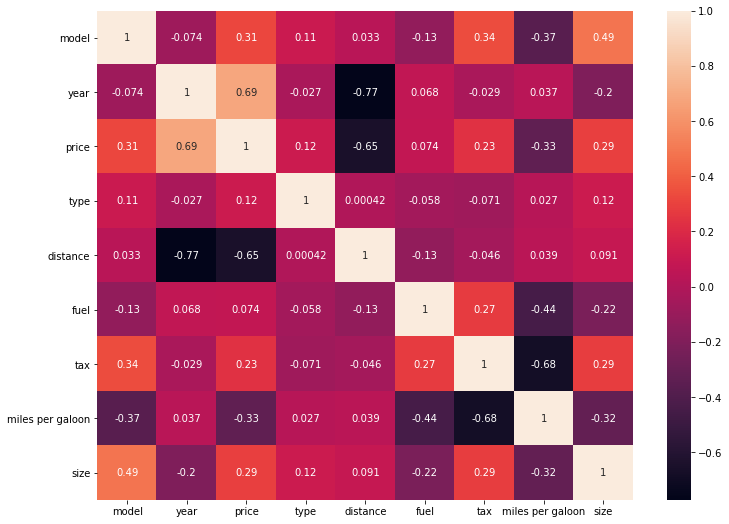

In [565]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшая корреляция между факторами Цена и Год

In [566]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,5.644144,2016.637752,22199.329297,1.324324,25467.468489,0.418919,128.691558,56.240469,2.097011
std,4.844716,2.065282,8053.960267,0.887965,18645.395418,0.800791,64.361121,11.415221,0.455323
min,0.000000,2009.880295,2880.000000,0.000000,17.000000,0.000000,0.000000,28.000000,1.300000
25%,2.000000,2016.000000,17493.500000,0.000000,11492.500000,0.000000,125.000000,47.900000,2.000000
50%,4.000000,2017.000000,20824.500000,2.000000,22909.000000,0.000000,145.000000,56.500000,2.100000
75%,9.000000,2018.000000,26983.750000,2.000000,34377.000000,0.000000,146.250000,64.200000,2.100000
max,16.000000,2020.000000,47718.743976,2.000000,85026.144142,2.000000,322.025955,97.628070,3.536389
